In [ ]:
import sys
!{sys.executable} -m pip install <package name>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
#print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("recons_dataset/combined_dataset.csv")

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,num
0,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,2
1,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,1
2,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,0
3,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,0
4,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0


In [4]:
dataset["num"].describe()

count    916.000000
mean       0.996725
std        1.143760
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

In [5]:
#Checking correlation between columns

print(dataset.corr()["num"].abs().sort_values(ascending=False))

num         1.000000
cp          0.397129
exang       0.348963
thalach     0.347325
age         0.340156
sex         0.260304
chol        0.232177
restecg     0.143534
fbs         0.132412
trestbps    0.113770
Name: num, dtype: float64


0    409
1    264
2    108
3    107
4     28
Name: num, dtype: int64


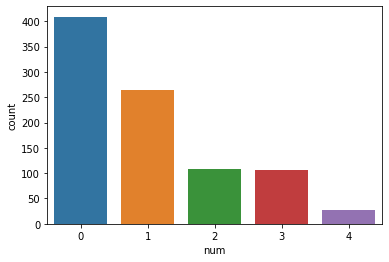

In [6]:
#Exploratory Data Analysis (EDA)

y = dataset["num"]

sns.countplot(y)


target_temp = dataset.num.value_counts()

print(target_temp)

<AxesSubplot:xlabel='sex', ylabel='num'>

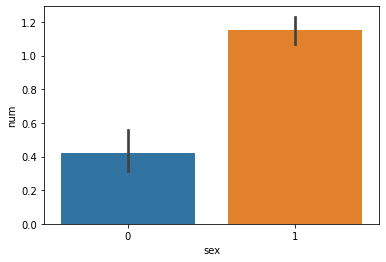

In [7]:
sns.barplot(dataset["sex"],y)

<AxesSubplot:xlabel='cp', ylabel='num'>

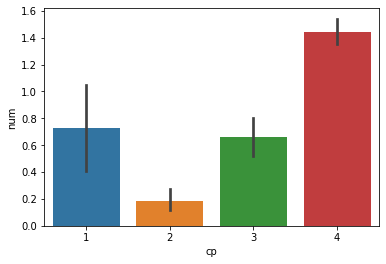

In [8]:
sns.barplot(dataset["cp"],y)

<AxesSubplot:xlabel='fbs', ylabel='num'>

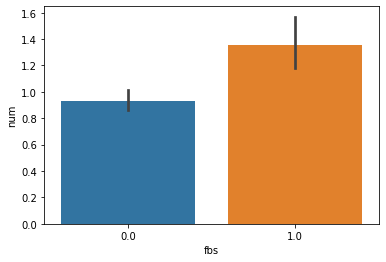

In [9]:
dataset["fbs"].unique()
sns.barplot(dataset["fbs"],y)

<AxesSubplot:xlabel='restecg', ylabel='num'>

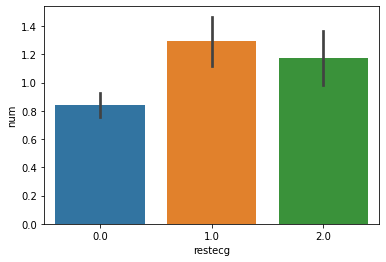

In [10]:
sns.barplot(dataset["restecg"],y)

<AxesSubplot:xlabel='exang', ylabel='num'>

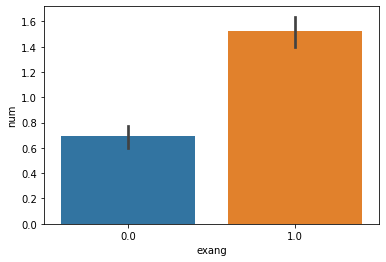

In [11]:
sns.barplot(dataset["exang"],y)

<AxesSubplot:xlabel='thalach', ylabel='Density'>

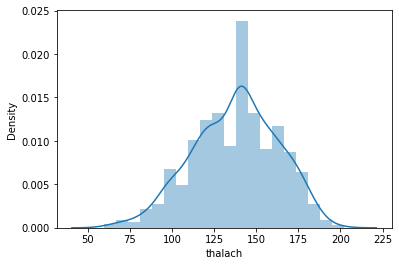

In [12]:
sns.distplot(dataset["thalach"])

In [13]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("num",axis=1)
target = dataset["num"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train,Y_train)

predictions = LR.predict(X_test)
val1 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for LR: ", val1, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(Y_test, predictions))

*Accuracy score for LR:  53.2608695652174 

*Confusion Matrix for LR: 
[[60 13  0  2  0]
 [14 36  0  3  0]
 [ 7 19  0  2  0]
 [ 4 15  0  2  1]
 [ 0  5  0  1  0]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        75
           1       0.41      0.68      0.51        53
           2       0.00      0.00      0.00        28
           3       0.20      0.09      0.13        22
           4       0.00      0.00      0.00         6

    accuracy                           0.53       184
   macro avg       0.26      0.31      0.28       184
weighted avg       0.43      0.53      0.47       184



# SVM

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
val2 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for SVM: ", val2, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(Y_test, predictions))

*Accuracy score for SVM:  54.347826086956516 

*Confusion Matrix for SVM: 
[[64 11  0  0  0]
 [19 33  0  1  0]
 [ 5 20  0  3  0]
 [ 5 14  0  3  0]
 [ 0  5  0  1  0]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        75
           1       0.40      0.62      0.49        53
           2       0.00      0.00      0.00        28
           3       0.38      0.14      0.20        22
           4       0.00      0.00      0.00         6

    accuracy                           0.54       184
   macro avg       0.29      0.32      0.29       184
weighted avg       0.44      0.54      0.47       184



# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,Y_train)
predictions = KNN.predict(X_test)
val3 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for SVM: ", val3, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(Y_test, predictions))


*Accuracy score for SVM:  45.65217391304348 

*Confusion Matrix for SVM: 
[[61 11  2  1  0]
 [29 18  5  1  0]
 [13  9  3  3  0]
 [11  8  1  2  0]
 [ 0  3  0  3  0]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.54      0.81      0.65        75
           1       0.37      0.34      0.35        53
           2       0.27      0.11      0.15        28
           3       0.20      0.09      0.13        22
           4       0.00      0.00      0.00         6

    accuracy                           0.46       184
   macro avg       0.28      0.27      0.26       184
weighted avg       0.39      0.46      0.40       184



# DT

In [18]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(Y_test, predictions))

The accuracy score achieved using Decision Tree is: 47.83 %
*Confusion Matrix for SVM: 
[[61 11  2  1  0]
 [29 18  5  1  0]
 [13  9  3  3  0]
 [11  8  1  2  0]
 [ 0  3  0  3  0]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.54      0.81      0.65        75
           1       0.37      0.34      0.35        53
           2       0.27      0.11      0.15        28
           3       0.20      0.09      0.13        22
           4       0.00      0.00      0.00         6

    accuracy                           0.46       184
   macro avg       0.28      0.27      0.26       184
weighted avg       0.39      0.46      0.40       184



# RF

In [19]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict(X_test)
val4 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for RF: ", val4, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(Y_test, predictions))


*Accuracy score for RF:  51.63043478260869 

*Confusion Matrix for RF: 
[[63 10  1  1  0]
 [22 21  5  5  0]
 [ 8 11  6  3  0]
 [ 5 10  2  5  0]
 [ 0  3  0  3  0]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.64      0.84      0.73        75
           1       0.38      0.40      0.39        53
           2       0.43      0.21      0.29        28
           3       0.29      0.23      0.26        22
           4       0.00      0.00      0.00         6

    accuracy                           0.52       184
   macro avg       0.35      0.34      0.33       184
weighted avg       0.47      0.52      0.48       184



# MLP

In [20]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, Y_train)
predictions = MLP.predict(X_test)
val5 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for MLP: ", val5, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for MLP: ")
print(classification_report(Y_test, predictions))

*Accuracy score for MLP:  52.17391304347826 

*Confusion Matrix for MLP: 
[[62  5  6  2  0]
 [16 18 13  6  0]
 [ 6  5 12  5  0]
 [ 5  8  5  4  0]
 [ 0  3  1  2  0]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        75
           1       0.46      0.34      0.39        53
           2       0.32      0.43      0.37        28
           3       0.21      0.18      0.20        22
           4       0.00      0.00      0.00         6

    accuracy                           0.52       184
   macro avg       0.34      0.36      0.34       184
weighted avg       0.49      0.52      0.50       184



# GNB

In [21]:
from sklearn import naive_bayes
# Instanciate the classifier
GNB = naive_bayes.GaussianNB()
GNB.fit(X_train, Y_train)
predictions = GNB.predict(X_test)
val6 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for GNB: ", val6, "\n")
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(Y_test, predictions))

*Accuracy score for GNB:  51.63043478260869 

*Confusion Matrix for GNB: 
[[60  8  2  4  1]
 [15 26  6  6  0]
 [ 4 12  1 11  0]
 [ 4  9  1  8  0]
 [ 0  1  0  5  0]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        75
           1       0.46      0.49      0.48        53
           2       0.10      0.04      0.05        28
           3       0.24      0.36      0.29        22
           4       0.00      0.00      0.00         6

    accuracy                           0.52       184
   macro avg       0.30      0.34      0.31       184
weighted avg       0.47      0.52      0.49       184



In [22]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
val7 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for VOT: ", val7, "\n")
print("*Confusion Matrix for VOT: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for VOT: ")
print(classification_report(Y_test, predictions))

*Accuracy score for VOT:  46.73913043478261 

*Confusion Matrix for VOT: 
[[68  5  0  1  1]
 [36 12  2  3  0]
 [17  6  3  2  0]
 [13  5  1  3  0]
 [ 5  0  0  1  0]]
*Classification Report for VOT: 
              precision    recall  f1-score   support

           0       0.49      0.91      0.64        75
           1       0.43      0.23      0.30        53
           2       0.50      0.11      0.18        28
           3       0.30      0.14      0.19        22
           4       0.00      0.00      0.00         6

    accuracy                           0.47       184
   macro avg       0.34      0.28      0.26       184
weighted avg       0.43      0.47      0.39       184



# Comparsion of differ Accuracy

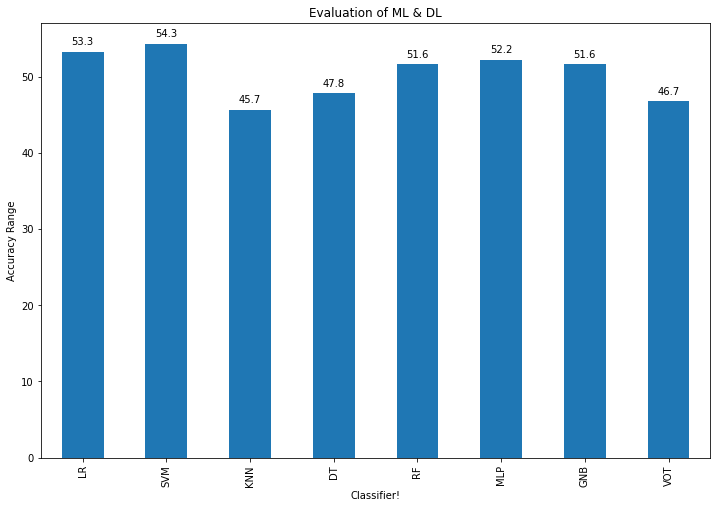

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [val1,val2,val3,score_dt,val4,val5,val6,val7]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['LR','SVM','KNN', 'DT','RF','MLP','GNB','VOT']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")